## Importing Libraries
### Detect smoke with the help of IOT data and trigger a fire alarm.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# for visualization of missing values
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_csv('D:/Pyspark-folder/Smoke_Detection_IOT/smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


### Feature Description
    1.UTC - The time when experiment was performed.
    2.Temperature - Temperature of Surroundings. Measured in Celsius
    3.Humidity - The air humidity during the experiment.
    3.TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
    4.eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
    5.Raw H2 - The amount of Raw Hydrogen present in the surroundings.
    6.Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
    7.Pressure - Air pressure. Measured in hPa
    8.PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
    9.PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
    10.NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
    11.NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
    12.NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
    13.CNT - Simple Count.
    14.Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.




In [3]:
df.drop(columns = ['Unnamed: 0','UTC','CNT'],inplace = True)

In [4]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [6]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

## Exploratory Data Analysis

In [7]:
# Let's refer our dataframe
df.sample(4)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
44434,24.440,53.98,1216,400,12926,19427,938.690,1.54,1.60,10.60,1.653,0.037,1
2671,15.582,46.78,84,400,13192,20090,939.644,0.94,0.98,6.47,1.009,0.023,0
8087,-4.266,56.68,312,400,13101,19945,939.383,0.26,0.27,1.81,0.282,0.006,1
24484,-1.641,51.81,1264,400,12995,19410,938.764,1.59,1.65,10.96,1.709,0.039,1


<AxesSubplot:ylabel='Fire Alarm'>

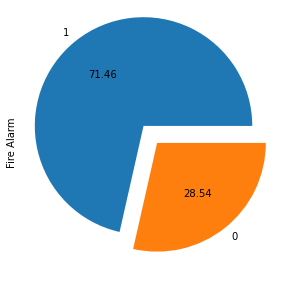

In [8]:
fig = plt.figure(figsize = (15,5))
myexplode = [0.2, 0]
df['Fire Alarm'].value_counts().plot(kind ='pie',autopct = '%.2f',explode = myexplode)

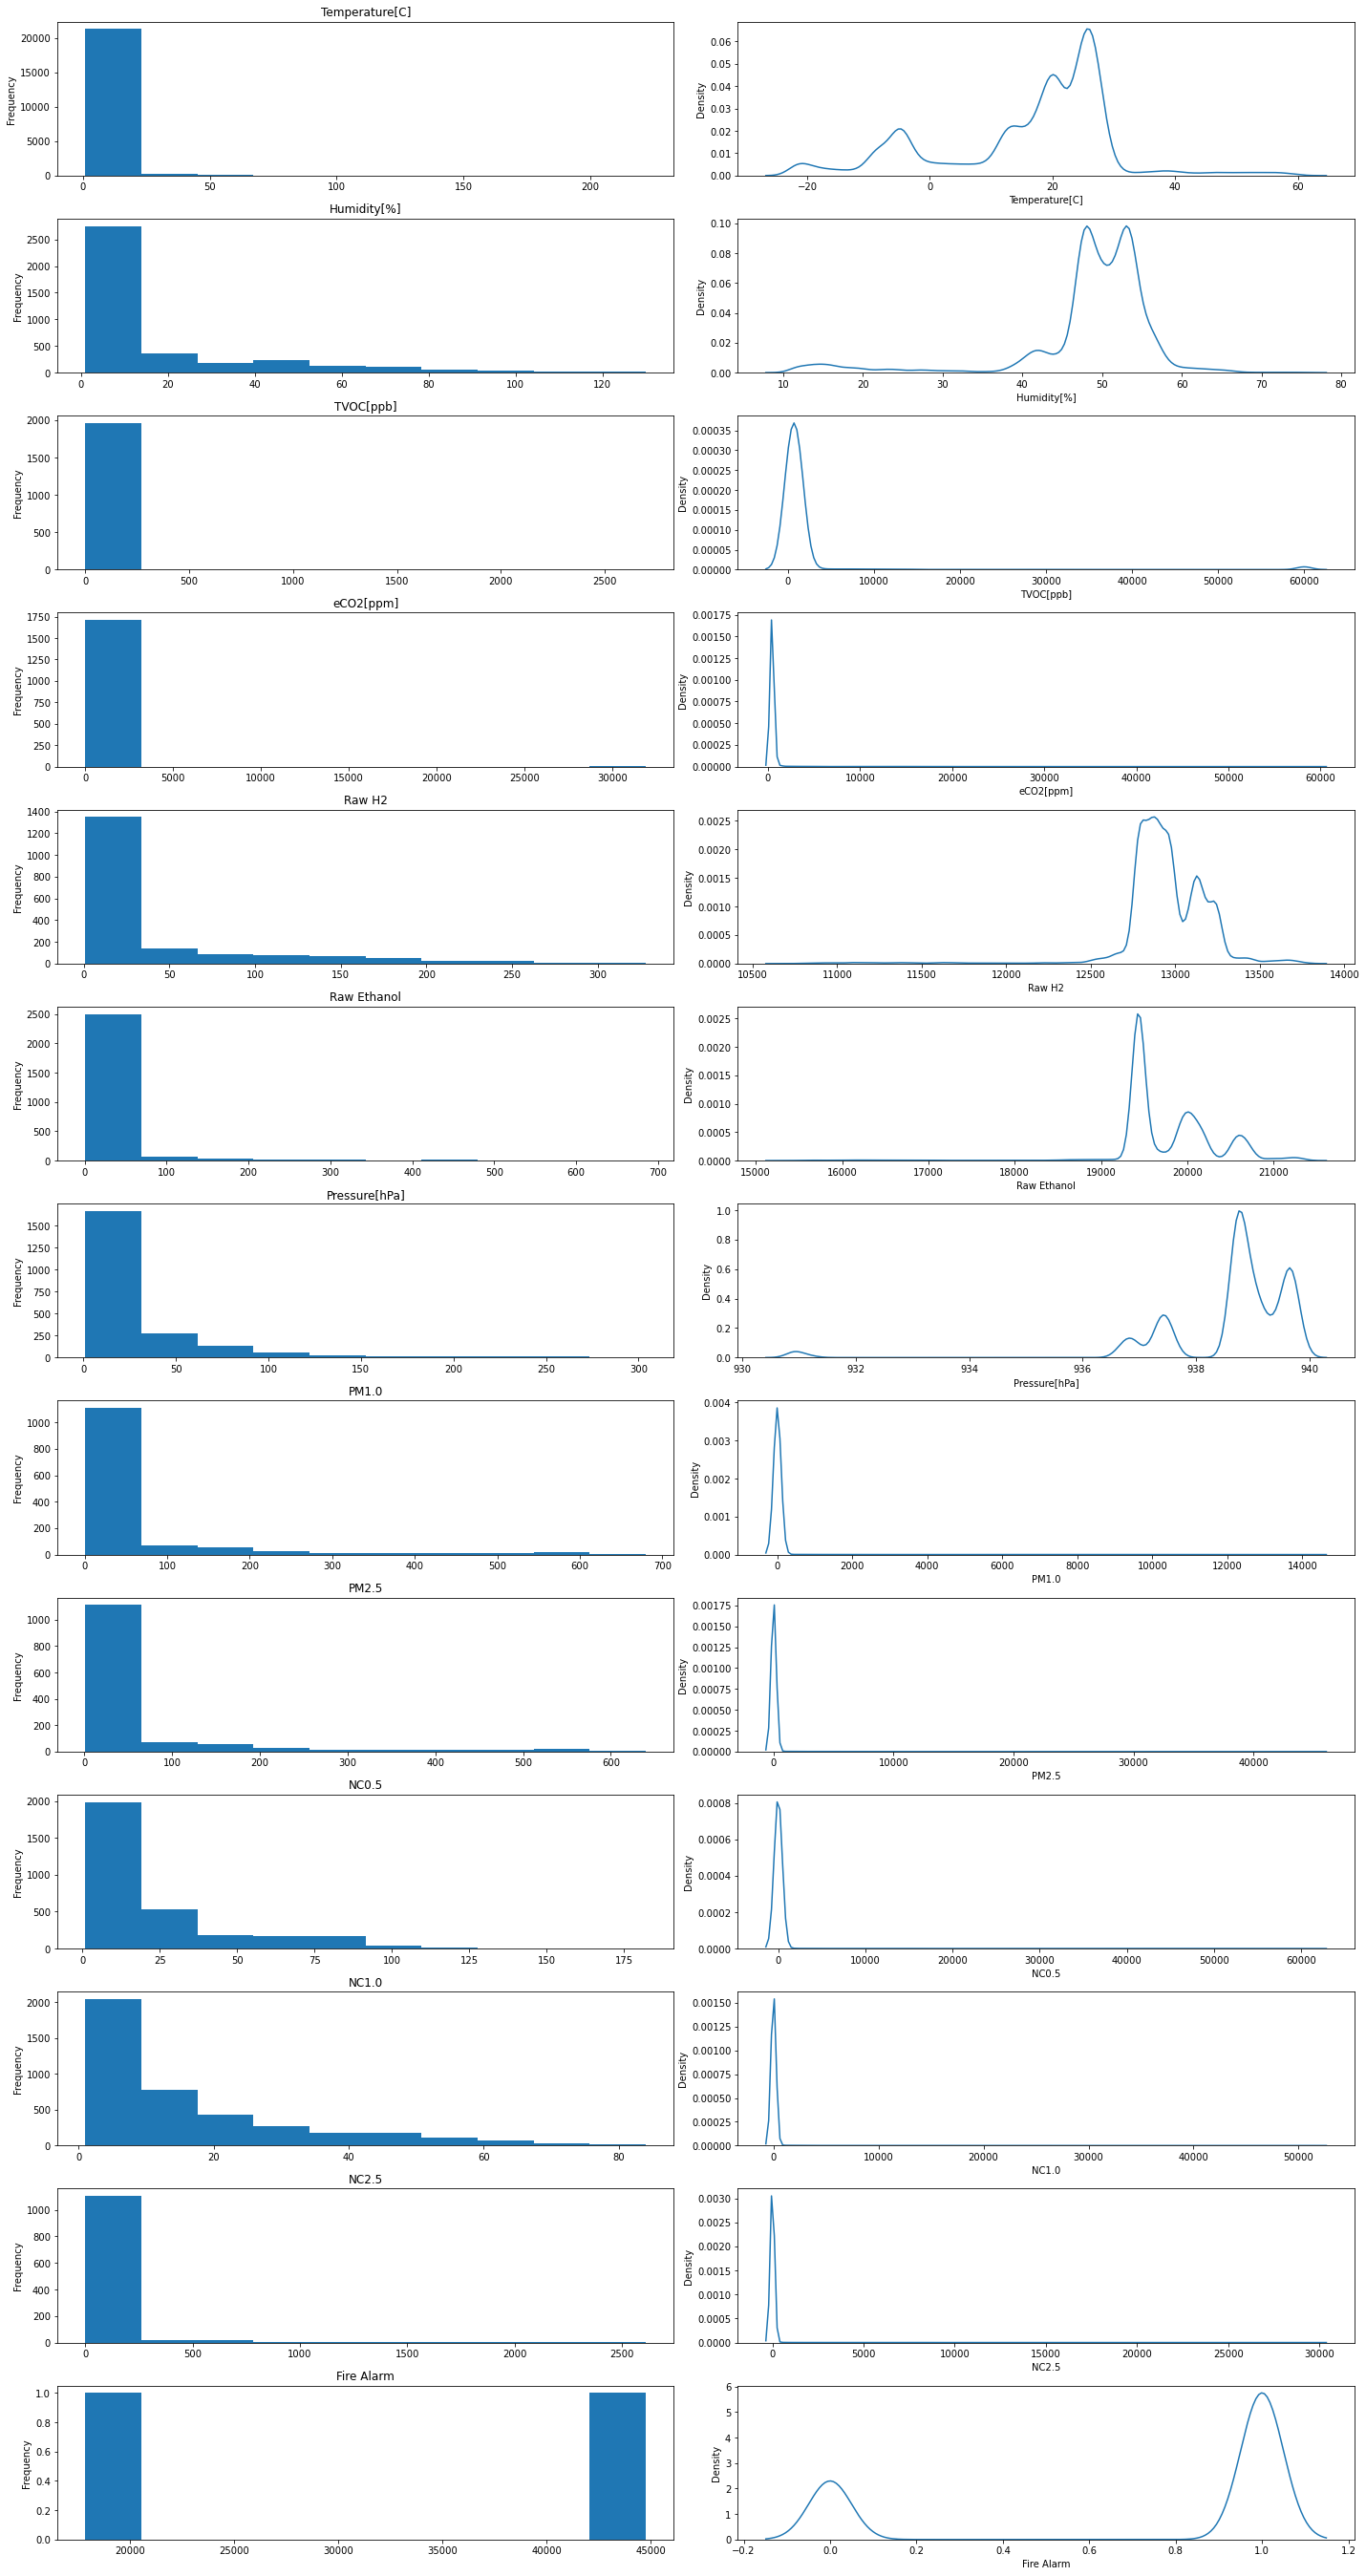

In [9]:
j =1
fig = plt.figure(figsize = (20,40))
for i in df.columns: 
    plt.subplot(14,2,j)
    df[i].value_counts().plot(kind ='hist')
    j=j+1
    plt.title(i)
    plt.subplot(14,2,j)
    sns.distplot(df[i],hist = False)
    j = j+1
    
plt.tight_layout()

#### Based on the histogram and distribution plots shown above, it is apparent that a significant portion of the fields display skewness. This suggests the presence of outliers within our dataset. We can further confirm this by utilizing boxplots for visualization

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


### Few Obseravtions:
* Pressure and Humidity have a high correlation.
* Temperature does not has a important role in detection
* Since PM's and NC's have high correlation with each other.
* TVOC,PM's and NC's are principal attributes which can be used for classification as the difference is very high.

<AxesSubplot:xlabel='Fire Alarm', ylabel='eCO2[ppm]'>

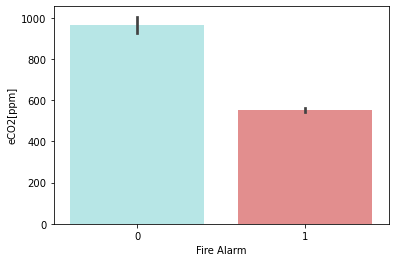

In [11]:
sns.barplot(x=df['Fire Alarm'] ,y= df['eCO2[ppm]'],palette = ['paleturquoise', 'lightcoral'])

### The plot displayed above indicates that when co2 equivalent concentration reduces that there is a chance of triggering a fire alarm.

<AxesSubplot:xlabel='Fire Alarm', ylabel='Humidity[%]'>

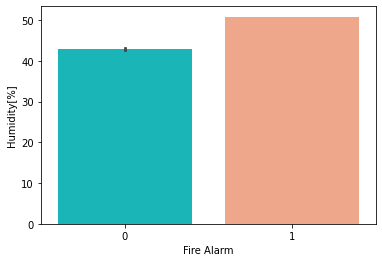

In [12]:
sns.barplot(x=df['Fire Alarm'] , y=df['Humidity[%]'],palette = ['darkturquoise', 'lightsalmon'])

### With a slight change(increase) in Humidity% the File Alarm will trigger. This reason is true since a fire smoke will increase the humidity in the air.

Smoke does not consist of only a single particle size but has a range of particle sizes with a peak concentration at a certain size. Particle sizes may range between 0.005 and 5 micrometers.
we will check the triggering of our fire alarm with different particulate size.

<AxesSubplot:xlabel='Fire Alarm', ylabel='PM2.5'>

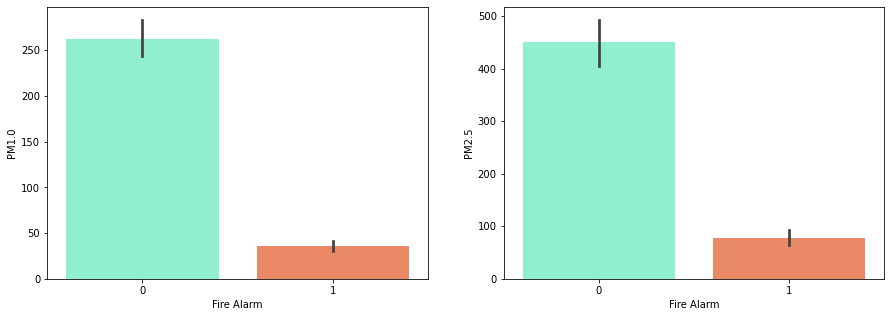

In [13]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=df['Fire Alarm'] ,y= df['PM1.0'],palette = ['aquamarine', 'coral'])
plt.subplot(122)
sns.barplot(x= df['Fire Alarm'] , y= df['PM2.5'],palette = ['aquamarine', 'coral'])

### The plot shown above indicates that the smoke particulates that trigger the smoke alarm are usually of very small size.

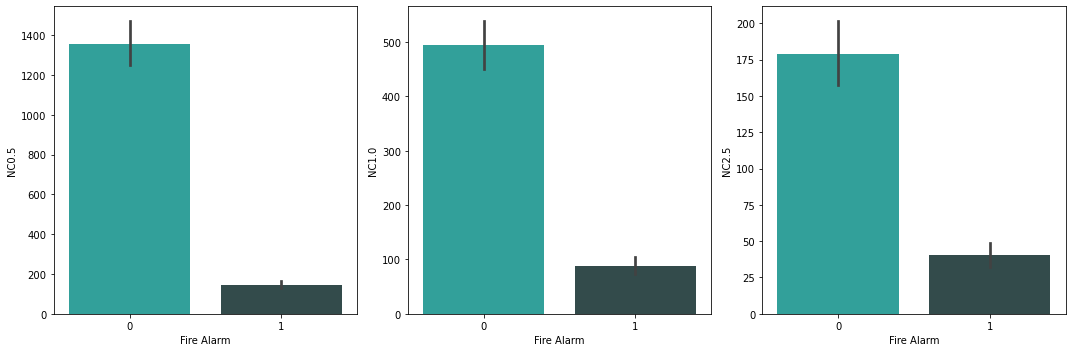

In [14]:
fig = plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(x=df['Fire Alarm'] ,y= df['NC0.5'],palette = ['lightseagreen', 'darkslategray'])
plt.subplot(132)
sns.barplot(x=df['Fire Alarm'] ,y= df['NC1.0'],palette = ['lightseagreen', 'darkslategray'])
plt.subplot(133)
sns.barplot(x=df['Fire Alarm'] ,y= df['NC2.5'],palette = ['lightseagreen', 'darkslategray'])
plt.tight_layout()

### As we can see decrease in Number concentration of particulate matter will lead to trigger smoke alarm.

## Data Preprocessing and Splitting

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
X = df.drop(columns ='Fire Alarm')
y= df['Fire Alarm']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state =12)

In [18]:
## Creating a function to work with Different models.

model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

In [19]:
model_df

{}

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8844802810154878


In [21]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 1.0


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.9996806642184257


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.9997604981638193


### Taking RandomForestClassifier

In [24]:
# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
# Map the predicted labels to descriptive strings
prediction_mapping = {1: "Fire Alarm Triggered - Smoke Detected", 0: "No Fire Alarm - No Smoke Detected"}
y_pred_mapped = [prediction_mapping[prediction] for prediction in y_pred]

In [31]:
# Print the predicted output
print("Predicted Output:")
for i, prediction in enumerate(y_pred_mapped):
    print(f"Output {i+1}: {prediction}")

Predicted Output:
Output 1: Fire Alarm Triggered - Smoke Detected
Output 2: Fire Alarm Triggered - Smoke Detected
Output 3: Fire Alarm Triggered - Smoke Detected
Output 4: No Fire Alarm - No Smoke Detected
Output 5: Fire Alarm Triggered - Smoke Detected
Output 6: Fire Alarm Triggered - Smoke Detected
Output 7: Fire Alarm Triggered - Smoke Detected
Output 8: Fire Alarm Triggered - Smoke Detected
Output 9: Fire Alarm Triggered - Smoke Detected
Output 10: Fire Alarm Triggered - Smoke Detected
Output 11: Fire Alarm Triggered - Smoke Detected
Output 12: No Fire Alarm - No Smoke Detected
Output 13: Fire Alarm Triggered - Smoke Detected
Output 14: Fire Alarm Triggered - Smoke Detected
Output 15: No Fire Alarm - No Smoke Detected
Output 16: No Fire Alarm - No Smoke Detected
Output 17: Fire Alarm Triggered - Smoke Detected
Output 18: No Fire Alarm - No Smoke Detected
Output 19: Fire Alarm Triggered - Smoke Detected
Output 20: Fire Alarm Triggered - Smoke Detected
Output 21: Fire Alarm Triggered

Output 1192: Fire Alarm Triggered - Smoke Detected
Output 1193: Fire Alarm Triggered - Smoke Detected
Output 1194: No Fire Alarm - No Smoke Detected
Output 1195: No Fire Alarm - No Smoke Detected
Output 1196: Fire Alarm Triggered - Smoke Detected
Output 1197: No Fire Alarm - No Smoke Detected
Output 1198: Fire Alarm Triggered - Smoke Detected
Output 1199: Fire Alarm Triggered - Smoke Detected
Output 1200: Fire Alarm Triggered - Smoke Detected
Output 1201: No Fire Alarm - No Smoke Detected
Output 1202: Fire Alarm Triggered - Smoke Detected
Output 1203: Fire Alarm Triggered - Smoke Detected
Output 1204: Fire Alarm Triggered - Smoke Detected
Output 1205: No Fire Alarm - No Smoke Detected
Output 1206: Fire Alarm Triggered - Smoke Detected
Output 1207: Fire Alarm Triggered - Smoke Detected
Output 1208: Fire Alarm Triggered - Smoke Detected
Output 1209: No Fire Alarm - No Smoke Detected
Output 1210: Fire Alarm Triggered - Smoke Detected
Output 1211: Fire Alarm Triggered - Smoke Detected
Outp

Output 2071: No Fire Alarm - No Smoke Detected
Output 2072: Fire Alarm Triggered - Smoke Detected
Output 2073: Fire Alarm Triggered - Smoke Detected
Output 2074: No Fire Alarm - No Smoke Detected
Output 2075: No Fire Alarm - No Smoke Detected
Output 2076: No Fire Alarm - No Smoke Detected
Output 2077: Fire Alarm Triggered - Smoke Detected
Output 2078: Fire Alarm Triggered - Smoke Detected
Output 2079: Fire Alarm Triggered - Smoke Detected
Output 2080: Fire Alarm Triggered - Smoke Detected
Output 2081: No Fire Alarm - No Smoke Detected
Output 2082: Fire Alarm Triggered - Smoke Detected
Output 2083: No Fire Alarm - No Smoke Detected
Output 2084: Fire Alarm Triggered - Smoke Detected
Output 2085: Fire Alarm Triggered - Smoke Detected
Output 2086: Fire Alarm Triggered - Smoke Detected
Output 2087: Fire Alarm Triggered - Smoke Detected
Output 2088: No Fire Alarm - No Smoke Detected
Output 2089: Fire Alarm Triggered - Smoke Detected
Output 2090: Fire Alarm Triggered - Smoke Detected
Output 2

Output 3371: Fire Alarm Triggered - Smoke Detected
Output 3372: No Fire Alarm - No Smoke Detected
Output 3373: Fire Alarm Triggered - Smoke Detected
Output 3374: Fire Alarm Triggered - Smoke Detected
Output 3375: No Fire Alarm - No Smoke Detected
Output 3376: Fire Alarm Triggered - Smoke Detected
Output 3377: Fire Alarm Triggered - Smoke Detected
Output 3378: No Fire Alarm - No Smoke Detected
Output 3379: Fire Alarm Triggered - Smoke Detected
Output 3380: Fire Alarm Triggered - Smoke Detected
Output 3381: Fire Alarm Triggered - Smoke Detected
Output 3382: Fire Alarm Triggered - Smoke Detected
Output 3383: Fire Alarm Triggered - Smoke Detected
Output 3384: No Fire Alarm - No Smoke Detected
Output 3385: Fire Alarm Triggered - Smoke Detected
Output 3386: Fire Alarm Triggered - Smoke Detected
Output 3387: No Fire Alarm - No Smoke Detected
Output 3388: Fire Alarm Triggered - Smoke Detected
Output 3389: Fire Alarm Triggered - Smoke Detected
Output 3390: Fire Alarm Triggered - Smoke Detected


Output 4559: No Fire Alarm - No Smoke Detected
Output 4560: Fire Alarm Triggered - Smoke Detected
Output 4561: Fire Alarm Triggered - Smoke Detected
Output 4562: No Fire Alarm - No Smoke Detected
Output 4563: Fire Alarm Triggered - Smoke Detected
Output 4564: Fire Alarm Triggered - Smoke Detected
Output 4565: Fire Alarm Triggered - Smoke Detected
Output 4566: No Fire Alarm - No Smoke Detected
Output 4567: Fire Alarm Triggered - Smoke Detected
Output 4568: No Fire Alarm - No Smoke Detected
Output 4569: Fire Alarm Triggered - Smoke Detected
Output 4570: Fire Alarm Triggered - Smoke Detected
Output 4571: Fire Alarm Triggered - Smoke Detected
Output 4572: No Fire Alarm - No Smoke Detected
Output 4573: Fire Alarm Triggered - Smoke Detected
Output 4574: Fire Alarm Triggered - Smoke Detected
Output 4575: Fire Alarm Triggered - Smoke Detected
Output 4576: Fire Alarm Triggered - Smoke Detected
Output 4577: No Fire Alarm - No Smoke Detected
Output 4578: No Fire Alarm - No Smoke Detected
Output 4

Output 5967: No Fire Alarm - No Smoke Detected
Output 5968: No Fire Alarm - No Smoke Detected
Output 5969: No Fire Alarm - No Smoke Detected
Output 5970: Fire Alarm Triggered - Smoke Detected
Output 5971: Fire Alarm Triggered - Smoke Detected
Output 5972: No Fire Alarm - No Smoke Detected
Output 5973: No Fire Alarm - No Smoke Detected
Output 5974: No Fire Alarm - No Smoke Detected
Output 5975: No Fire Alarm - No Smoke Detected
Output 5976: Fire Alarm Triggered - Smoke Detected
Output 5977: Fire Alarm Triggered - Smoke Detected
Output 5978: Fire Alarm Triggered - Smoke Detected
Output 5979: Fire Alarm Triggered - Smoke Detected
Output 5980: Fire Alarm Triggered - Smoke Detected
Output 5981: Fire Alarm Triggered - Smoke Detected
Output 5982: Fire Alarm Triggered - Smoke Detected
Output 5983: Fire Alarm Triggered - Smoke Detected
Output 5984: Fire Alarm Triggered - Smoke Detected
Output 5985: Fire Alarm Triggered - Smoke Detected
Output 5986: Fire Alarm Triggered - Smoke Detected
Output 5

Output 7167: Fire Alarm Triggered - Smoke Detected
Output 7168: Fire Alarm Triggered - Smoke Detected
Output 7169: Fire Alarm Triggered - Smoke Detected
Output 7170: Fire Alarm Triggered - Smoke Detected
Output 7171: Fire Alarm Triggered - Smoke Detected
Output 7172: Fire Alarm Triggered - Smoke Detected
Output 7173: Fire Alarm Triggered - Smoke Detected
Output 7174: Fire Alarm Triggered - Smoke Detected
Output 7175: Fire Alarm Triggered - Smoke Detected
Output 7176: Fire Alarm Triggered - Smoke Detected
Output 7177: Fire Alarm Triggered - Smoke Detected
Output 7178: No Fire Alarm - No Smoke Detected
Output 7179: Fire Alarm Triggered - Smoke Detected
Output 7180: No Fire Alarm - No Smoke Detected
Output 7181: Fire Alarm Triggered - Smoke Detected
Output 7182: Fire Alarm Triggered - Smoke Detected
Output 7183: Fire Alarm Triggered - Smoke Detected
Output 7184: Fire Alarm Triggered - Smoke Detected
Output 7185: Fire Alarm Triggered - Smoke Detected
Output 7186: Fire Alarm Triggered - Smo

Output 8167: No Fire Alarm - No Smoke Detected
Output 8168: Fire Alarm Triggered - Smoke Detected
Output 8169: Fire Alarm Triggered - Smoke Detected
Output 8170: Fire Alarm Triggered - Smoke Detected
Output 8171: Fire Alarm Triggered - Smoke Detected
Output 8172: Fire Alarm Triggered - Smoke Detected
Output 8173: No Fire Alarm - No Smoke Detected
Output 8174: No Fire Alarm - No Smoke Detected
Output 8175: No Fire Alarm - No Smoke Detected
Output 8176: Fire Alarm Triggered - Smoke Detected
Output 8177: No Fire Alarm - No Smoke Detected
Output 8178: Fire Alarm Triggered - Smoke Detected
Output 8179: Fire Alarm Triggered - Smoke Detected
Output 8180: Fire Alarm Triggered - Smoke Detected
Output 8181: No Fire Alarm - No Smoke Detected
Output 8182: Fire Alarm Triggered - Smoke Detected
Output 8183: No Fire Alarm - No Smoke Detected
Output 8184: Fire Alarm Triggered - Smoke Detected
Output 8185: Fire Alarm Triggered - Smoke Detected
Output 8186: Fire Alarm Triggered - Smoke Detected
Output 8

Output 9309: Fire Alarm Triggered - Smoke Detected
Output 9310: Fire Alarm Triggered - Smoke Detected
Output 9311: Fire Alarm Triggered - Smoke Detected
Output 9312: Fire Alarm Triggered - Smoke Detected
Output 9313: No Fire Alarm - No Smoke Detected
Output 9314: Fire Alarm Triggered - Smoke Detected
Output 9315: No Fire Alarm - No Smoke Detected
Output 9316: Fire Alarm Triggered - Smoke Detected
Output 9317: Fire Alarm Triggered - Smoke Detected
Output 9318: Fire Alarm Triggered - Smoke Detected
Output 9319: Fire Alarm Triggered - Smoke Detected
Output 9320: Fire Alarm Triggered - Smoke Detected
Output 9321: Fire Alarm Triggered - Smoke Detected
Output 9322: No Fire Alarm - No Smoke Detected
Output 9323: No Fire Alarm - No Smoke Detected
Output 9324: Fire Alarm Triggered - Smoke Detected
Output 9325: No Fire Alarm - No Smoke Detected
Output 9326: Fire Alarm Triggered - Smoke Detected
Output 9327: Fire Alarm Triggered - Smoke Detected
Output 9328: No Fire Alarm - No Smoke Detected
Outp

Output 10666: Fire Alarm Triggered - Smoke Detected
Output 10667: No Fire Alarm - No Smoke Detected
Output 10668: No Fire Alarm - No Smoke Detected
Output 10669: Fire Alarm Triggered - Smoke Detected
Output 10670: No Fire Alarm - No Smoke Detected
Output 10671: No Fire Alarm - No Smoke Detected
Output 10672: No Fire Alarm - No Smoke Detected
Output 10673: Fire Alarm Triggered - Smoke Detected
Output 10674: Fire Alarm Triggered - Smoke Detected
Output 10675: Fire Alarm Triggered - Smoke Detected
Output 10676: No Fire Alarm - No Smoke Detected
Output 10677: Fire Alarm Triggered - Smoke Detected
Output 10678: Fire Alarm Triggered - Smoke Detected
Output 10679: No Fire Alarm - No Smoke Detected
Output 10680: Fire Alarm Triggered - Smoke Detected
Output 10681: Fire Alarm Triggered - Smoke Detected
Output 10682: Fire Alarm Triggered - Smoke Detected
Output 10683: Fire Alarm Triggered - Smoke Detected
Output 10684: Fire Alarm Triggered - Smoke Detected
Output 10685: Fire Alarm Triggered - Smo

Output 11881: Fire Alarm Triggered - Smoke Detected
Output 11882: Fire Alarm Triggered - Smoke Detected
Output 11883: Fire Alarm Triggered - Smoke Detected
Output 11884: Fire Alarm Triggered - Smoke Detected
Output 11885: Fire Alarm Triggered - Smoke Detected
Output 11886: Fire Alarm Triggered - Smoke Detected
Output 11887: No Fire Alarm - No Smoke Detected
Output 11888: Fire Alarm Triggered - Smoke Detected
Output 11889: No Fire Alarm - No Smoke Detected
Output 11890: Fire Alarm Triggered - Smoke Detected
Output 11891: No Fire Alarm - No Smoke Detected
Output 11892: No Fire Alarm - No Smoke Detected
Output 11893: Fire Alarm Triggered - Smoke Detected
Output 11894: Fire Alarm Triggered - Smoke Detected
Output 11895: Fire Alarm Triggered - Smoke Detected
Output 11896: Fire Alarm Triggered - Smoke Detected
Output 11897: Fire Alarm Triggered - Smoke Detected
Output 11898: Fire Alarm Triggered - Smoke Detected
Output 11899: No Fire Alarm - No Smoke Detected
Output 11900: No Fire Alarm - No